In [4]:
using Zygote
using LinearAlgebra
using PyPlot

In this notebook we look into the performance of matrix completion / tensor factorization using neural networks, following [this](http://www.offconvex.org/2021/07/08/imp-reg-tf/) blog post.

In [11]:
function rand_mat_given_k(n, k)
    mat = rand(n,k) * rand(k,n)
    return mat ./ norm(mat)
end

function get_mask(n, p)
    mask = [rand()>p for _ in 1:n*n]
    return reshape(mask, n, n)
end


function l2_loss(mat, mask, Ws)
    tmp = (*(Ws...) - mat) .* mask
    return sum(tmp .^ 2)
end

function train!(mat, mask, lr, Ws)
    _, _, g_Ws = gradient(l2_loss, mat, mask, Ws)
    Ws .-= lr .* g_Ws
    return nothing
end

train! (generic function with 1 method)

## Matrix completion

### Fixed depth = 2, change learning rate

In [126]:
m = 2
n = 64
k = 12
p = 0.5
n_step = 2000

ini_norm = (1e-8).^(1/m)
lr = 1e-2

Ws = [randn(n,n) for _ in 1:m] .* ini_norm
mat = rand_mat_given_k(n, k)
# mat = randn(n,n)
mask = get_mask(n, p)

losses = []
errs = []



for _ in 1:n_step
    train!(mat, mask, lr, Ws)
    loss = l2_loss(mat, mask, Ws) ./ sum(mask)
    err = l2_loss(mat, .!mask, Ws) ./ sum(.!mask)
    push!(losses, loss)
    push!(errs, err)
end

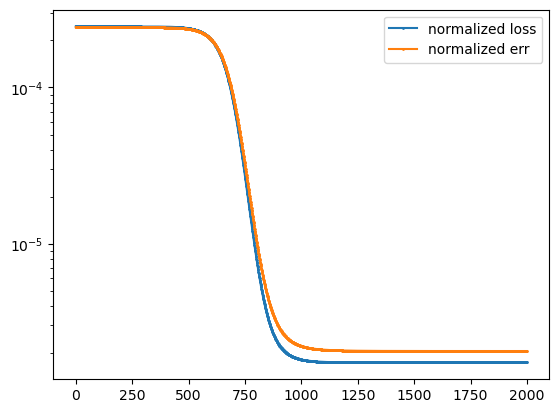

PyObject <matplotlib.legend.Legend object at 0x0000000064143EE0>

In [127]:
plot(losses, "-o", ms=1, label="normalized loss")
plot(errs, "-o", ms=1, label="normalized err")
yscale("log")
legend()

In [66]:
losses

100-element Array{Any,1}:
   3.6529179730351864e279
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [17]:
mask

8×8 Array{Bool,2}:
 1  1  1  1  1  1  1  1
 1  1  1  0  1  1  1  1
 1  0  1  1  1  1  1  1
 1  1  1  1  1  1  1  1
 1  1  1  0  1  1  1  1
 1  1  1  1  1  0  1  1
 1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1

In [18]:
Ws

1-element Array{Array{Float64,2},1}:
 [-8078.541977917878 1095.3318247755824 … 10061.667922392518 4805.541908299654; -1458.9476865415784 8192.371673592666 … -5392.612976088403 -8080.408973099034; … ; -6984.488832229687 -7972.2685265714545 … 4381.108486960437 6816.586950212095; 5851.07235370321 1736.0214276731454 … -8551.897599453881 -1274.9795665158942]